In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import config

plt.rcParams['figure.figsize'] = (16, 9)
sns.set_style("darkgrid")


In [2]:
connection = mysql.connector.connect(**config.connection())

In [3]:
class Database:
    def __init__(self, connection):
        self.connection = connection

    def query(self, query):
        cursor = self.connection.cursor(dictionary=True)
        cursor.execute(query)
        rows = cursor.fetchall()
        cursor.close()
        return rows

db = Database(connection)

In [4]:
df = pd.read_sql(
        '''
        SELECT e.emp_no AS Employee_Number,
        CONCAT(e.first_name, ' ', e.last_name) AS Employee_Name,
        e.gender AS Gender,
        d.dept_name AS department, d.dept_no AS Department_Number, 
        s.salary AS Employee_Salary,
        manager.emp_no AS Manager_id,
        CONCAT(manager.first_name, ' ', manager.last_name)
        AS Manager, man_sal.salary AS Manager_Salary
        FROM current_dept_emp cdept
        INNER JOIN employees e
        ON e.emp_no = cdept.emp_no
        INNER JOIN departments d
        ON d.dept_no = cdept.dept_no
        INNER JOIN 
        (SELECT dept_no AS dn, emp_no AS en FROM 
        dept_manager WHERE from_date IN
        (SELECT MAX(from_date) FROM dept_manager GROUP BY dept_no)) dm
        ON dm.dn = cdept.dept_no
        INNER JOIN
        employees manager
        ON manager.emp_no = dm.en
        INNER JOIN
        (SELECT s1.* FROM salaries AS s1 
        LEFT JOIN salaries AS s2
        ON (s1.emp_no = s2.emp_no AND s1.from_date < s2.from_date)
        WHERE s2.from_date IS NULL) s
        ON s.emp_no = cdept.emp_no
        INNER JOIN 
        (SELECT s1.* FROM salaries AS s1 
        LEFT JOIN salaries AS s2
        ON (s1.emp_no = s2.emp_no AND s1.from_date < s2.from_date)
        WHERE s2.from_date IS NULL) man_sal
        ON man_sal.emp_no = manager.emp_no 
        WHERE s.salary > man_sal.salary;
        ''', connection
)

In [5]:
df.head(10)

,Employee_Number,Employee_Name,Gender,department,Department_Number,Employee_Salary,Manager_id,Manager,Manager_Salary
0,10001,Georgi Facello,M,Development,d005,88958,110567,Leon DasSarma,74510
1,10004,Chirstian Koblick,M,Production,d004,74057,110420,Oscar Ghazalie,56654
2,10005,Kyoichi Maliniak,M,Human Resources,d003,94692,110228,Karsten Sigstam,65400
3,10007,Tzvetan Zielinski,F,Research,d008,88070,111534,Hilary Kambil,79393
4,10009,Sumant Peac,F,Quality Management,d006,94409,110854,Dung Pesch,72876
5,10010,Duangkaew Piveteau,F,Quality Management,d006,80324,110854,Dung Pesch,72876
6,10013,Eberhardt Terkki,M,Human Resources,d003,68901,110228,Karsten Sigstam,65400
7,10018,Kazuhide Peha,F,Production,d004,84672,110420,Oscar Ghazalie,56654
8,10021,Ramzi Erde,M,Development,d005,84169,110567,Leon DasSarma,74510
9,10024,Suzette Pettey,F,Production,d004,96646,110420,Oscar Ghazalie,56654


In [6]:
df.shape

(109306, 9)

In [7]:
len(df)

109306

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109306 entries, 0 to 109305
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Employee_Number    109306 non-null  int64 
 1   Employee_Name      109306 non-null  object
 2   Gender             109306 non-null  object
 3   department         109306 non-null  object
 4   Department_Number  109306 non-null  object
 5   Employee_Salary    109306 non-null  int64 
 6   Manager_id         109306 non-null  int64 
 7   Manager            109306 non-null  object
 8   Manager_Salary     109306 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 7.5+ MB


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
print(df.describe())

       Employee_Number  Employee_Salary     Manager_id  Manager_Salary
count    109306.000000    109306.000000  109306.000000   109306.000000
mean     253248.644164     81300.580837  110715.852533    67731.581587
std      161914.348287     16277.653168     543.272723    14372.104063
min       10001.000000     56656.000000  110039.000000    56654.000000
25%       84896.250000     68759.000000  110420.000000    56654.000000
50%      250157.500000     78434.500000  110420.000000    58745.000000
75%      425131.750000     90086.750000  110854.000000    74510.000000
max      499999.000000    158220.000000  111939.000000   106491.000000


In [11]:
df.columns

Index(['Employee_Number', 'Employee_Name', 'Gender', 'department',
       'Department_Number', 'Employee_Salary', 'Manager_id', 'Manager',
       'Manager_Salary'],
      dtype='object')

In [12]:
df.nunique()

Employee_Number      109306
Employee_Name        106541
Gender                    2
department                9
Department_Number         9
Employee_Salary       48549
Manager_id                9
Manager                   9
Manager_Salary            9
dtype: int64

In [13]:
df.values

array([[10001, 'Georgi Facello', 'M', ..., 110567, 'Leon DasSarma',
        74510],
       [10004, 'Chirstian Koblick', 'M', ..., 110420, 'Oscar Ghazalie',
        56654],
       [10005, 'Kyoichi Maliniak', 'M', ..., 110228, 'Karsten Sigstam',
        65400],
       ...,
       [499996, 'Zito Baaz', 'M', ..., 110420, 'Oscar Ghazalie', 56654],
       [499997, 'Berhard Lenart', 'M', ..., 110567, 'Leon DasSarma',
        74510],
       [499999, 'Sachin Tsukuda', 'M', ..., 110420, 'Oscar Ghazalie',
        56654]], dtype=object)

In [14]:
print(df.head())

   Employee_Number      Employee_Name Gender          department  \
0            10001     Georgi Facello      M         Development   
1            10004  Chirstian Koblick      M          Production   
2            10005   Kyoichi Maliniak      M     Human Resources   
3            10007  Tzvetan Zielinski      F            Research   
4            10009        Sumant Peac      F  Quality Management   

  Department_Number  Employee_Salary  Manager_id          Manager  \
0              d005            88958      110567    Leon DasSarma   
1              d004            74057      110420   Oscar Ghazalie   
2              d003            94692      110228  Karsten Sigstam   
3              d008            88070      111534    Hilary Kambil   
4              d006            94409      110854       Dung Pesch   

   Manager_Salary  
0           74510  
1           56654  
2           65400  
3           79393  
4           72876  


In [26]:
# how many females are there in the Development department?
df[(df.Gender == 'f'.upper()) & (df.department == 'Development')].count()

Employee_Number      7822
Employee_Name        7822
Gender               7822
department           7822
Department_Number    7822
Employee_Salary      7822
Manager_id           7822
Manager              7822
Manager_Salary       7822
dtype: int64

In [34]:
# get all the employees with last name Facello
df.loc[df.Employee_Name.str.contains('Facello', case=False) & (df.Gender == 'm'.upper())]

,Employee_Number,Employee_Name,Gender,department,Department_Number,Employee_Salary,Manager_id,Manager,Manager_Salary
0,10001,Georgi Facello,M,Development,d005,88958,110567,Leon DasSarma,74510
5168,23938,Nahum Facello,M,Production,d004,79537,110420,Oscar Ghazalie,56654
6548,27732,Girolamo Facello,M,Development,d005,92207,110567,Leon DasSarma,74510
8313,32580,Kirk Facello,M,Development,d005,80671,110567,Leon DasSarma,74510
9659,36371,Cristinel Facello,M,Development,d005,86107,110567,Leon DasSarma,74510
15383,52277,Rance Facello,M,Quality Management,d006,84996,110854,Dung Pesch,72876
15925,53807,Mountaz Facello,M,Production,d004,77519,110420,Oscar Ghazalie,56654
17238,57432,Stafford Facello,M,Production,d004,64239,110420,Oscar Ghazalie,56654
19466,63380,Huan Facello,M,Production,d004,65245,110420,Oscar Ghazalie,56654
20400,65853,Nahid Facello,M,Production,d004,69180,110420,Oscar Ghazalie,56654


In [36]:
df.loc[df.Employee_Name.str.contains('Facello', case=False) & (df.Gender == 'm'.upper()) & (df.department == 'Development')]

,Employee_Number,Employee_Name,Gender,department,Department_Number,Employee_Salary,Manager_id,Manager,Manager_Salary
0,10001,Georgi Facello,M,Development,d005,88958,110567,Leon DasSarma,74510
6548,27732,Girolamo Facello,M,Development,d005,92207,110567,Leon DasSarma,74510
8313,32580,Kirk Facello,M,Development,d005,80671,110567,Leon DasSarma,74510
9659,36371,Cristinel Facello,M,Development,d005,86107,110567,Leon DasSarma,74510
28908,89220,Ramzi Facello,M,Development,d005,84290,110567,Leon DasSarma,74510
30952,94747,Clyde Facello,M,Development,d005,92433,110567,Leon DasSarma,74510
36686,200566,Mari Facello,M,Development,d005,88855,110567,Leon DasSarma,74510
48836,234115,Gill Facello,M,Development,d005,76238,110567,Leon DasSarma,74510
94617,459497,Phillip Facello,M,Development,d005,103006,110567,Leon DasSarma,74510
95401,461755,Alselm Facello,M,Development,d005,86573,110567,Leon DasSarma,74510


In [37]:
df.columns

Index(['Employee_Number', 'Employee_Name', 'Gender', 'department',
       'Department_Number', 'Employee_Salary', 'Manager_id', 'Manager',
       'Manager_Salary'],
      dtype='object')

In [38]:
df.Employee_Salary

0          88958
1          74057
2          94692
3          88070
4          94409
           ...  
109301    119906
109302    102085
109303     69501
109304     83441
109305     77303
Name: Employee_Salary, Length: 109306, dtype: int64

In [40]:
# employee whose salary is above 100000, gender is female and works in Development
df.loc[(df.Employee_Salary > 100000) & (df.Gender == 'f'.upper()) & (df.department == 'Development')]

,Employee_Number,Employee_Name,Gender,department,Department_Number,Employee_Salary,Manager_id,Manager,Manager_Salary
64,10150,Zhenbing Perng,F,Development,d005,100182,110567,Leon DasSarma,74510
104,10258,Basil Ishibashi,F,Development,d005,110212,110567,Leon DasSarma,74510
429,11106,Aris Iwayama,F,Development,d005,108369,110567,Leon DasSarma,74510
445,11162,Kauko Narlikar,F,Development,d005,106899,110567,Leon DasSarma,74510
651,11702,Radhia Kriebel,F,Development,d005,111291,110567,Leon DasSarma,74510
...,...,...,...,...,...,...,...,...,...
108372,497476,Danai Karnin,F,Development,d005,110643,110567,Leon DasSarma,74510
108873,498820,Nidapan Ritzmann,F,Development,d005,103292,110567,Leon DasSarma,74510
108917,498947,Tomoyuki Huhdanpaa,F,Development,d005,103721,110567,Leon DasSarma,74510
108956,499058,Mingzeng Quadeer,F,Development,d005,110239,110567,Leon DasSarma,74510


In [43]:
# compare the employee salary to the manager salary
df.groupby('Employee_Salary')['Employee_Salary'].count()

Employee_Salary
56656     6
56658     2
56659     2
56660     3
56661     3
         ..
155190    1
155513    1
155709    1
156286    1
158220    1
Name: Employee_Salary, Length: 48549, dtype: int64

In [44]:
df.groupby('Gender')['Gender'].count()

Gender
F    43708
M    65598
Name: Gender, dtype: int64

In [46]:
df.groupby('department')['department'].count()

department
Customer Service      13287
Development           19724
Finance                5276
Human Resources        5970
Marketing              1132
Production            46687
Quality Management     4262
Research               3372
Sales                  9596
Name: department, dtype: int64

In [47]:
df.head()

,Employee_Number,Employee_Name,Gender,department,Department_Number,Employee_Salary,Manager_id,Manager,Manager_Salary
0,10001,Georgi Facello,M,Development,d005,88958,110567,Leon DasSarma,74510
1,10004,Chirstian Koblick,M,Production,d004,74057,110420,Oscar Ghazalie,56654
2,10005,Kyoichi Maliniak,M,Human Resources,d003,94692,110228,Karsten Sigstam,65400
3,10007,Tzvetan Zielinski,F,Research,d008,88070,111534,Hilary Kambil,79393
4,10009,Sumant Peac,F,Quality Management,d006,94409,110854,Dung Pesch,72876


In [48]:
df.drop(['Manager_id', 'Manager', 'Manager_Salary'], axis=1, inplace=True)

In [49]:
df.head()

,Employee_Number,Employee_Name,Gender,department,Department_Number,Employee_Salary
0,10001,Georgi Facello,M,Development,d005,88958
1,10004,Chirstian Koblick,M,Production,d004,74057
2,10005,Kyoichi Maliniak,M,Human Resources,d003,94692
3,10007,Tzvetan Zielinski,F,Research,d008,88070
4,10009,Sumant Peac,F,Quality Management,d006,94409


In [51]:
df.rename(columns={'department': 'Department'}, inplace=True)

In [52]:
df.head(10)

,Employee_Number,Employee_Name,Gender,Department,Department_Number,Employee_Salary
0,10001,Georgi Facello,M,Development,d005,88958
1,10004,Chirstian Koblick,M,Production,d004,74057
2,10005,Kyoichi Maliniak,M,Human Resources,d003,94692
3,10007,Tzvetan Zielinski,F,Research,d008,88070
4,10009,Sumant Peac,F,Quality Management,d006,94409
5,10010,Duangkaew Piveteau,F,Quality Management,d006,80324
6,10013,Eberhardt Terkki,M,Human Resources,d003,68901
7,10018,Kazuhide Peha,F,Production,d004,84672
8,10021,Ramzi Erde,M,Development,d005,84169
9,10024,Suzette Pettey,F,Production,d004,96646


In [53]:
len(df)

109306

In [54]:
df.columns

Index(['Employee_Number', 'Employee_Name', 'Gender', 'Department',
       'Department_Number', 'Employee_Salary'],
      dtype='object')

In [55]:
df.Department.describe()

count         109306
unique             9
top       Production
freq           46687
Name: Department, dtype: object

In [56]:
df.Employee_Salary.describe()

count    109306.000000
mean      81300.580837
std       16277.653168
min       56656.000000
25%       68759.000000
50%       78434.500000
75%       90086.750000
max      158220.000000
Name: Employee_Salary, dtype: float64

In [57]:
df.Employee_Salary.mean()

81300.5808372825

In [58]:
df.Employee_Salary.median()

78434.5

<AxesSubplot:>

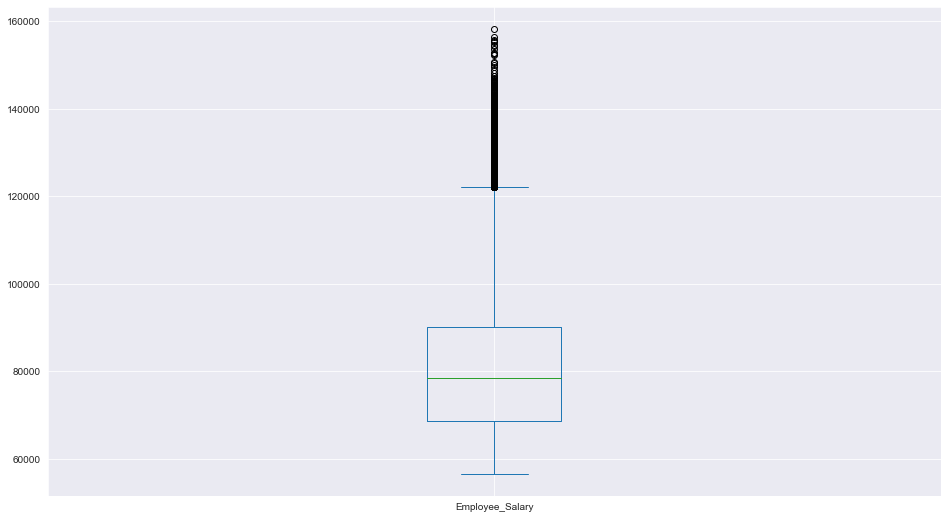

In [60]:
df.Employee_Salary.plot(kind='box')

<AxesSubplot:xlabel='Department', ylabel='Employee_Salary'>

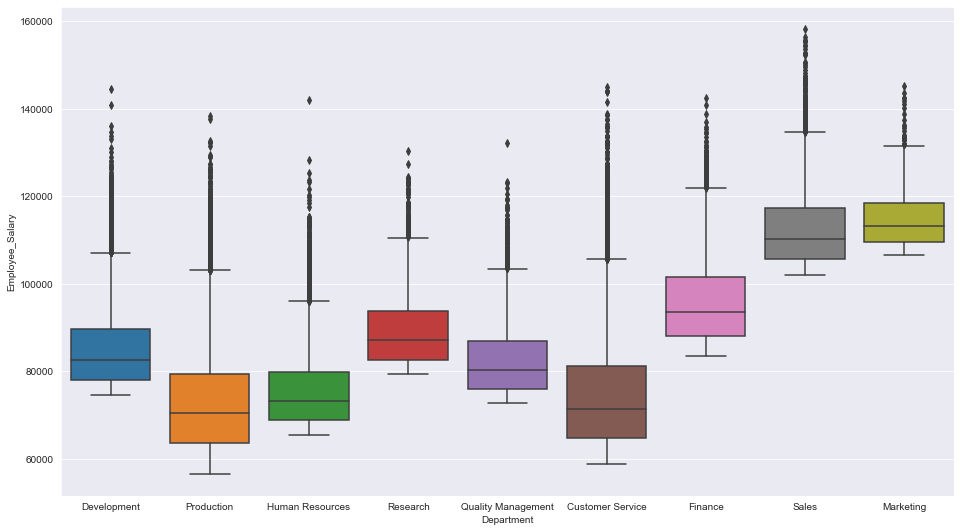

In [61]:
sns.boxplot(x='Department', y='Employee_Salary', data=df)

<AxesSubplot:ylabel='Density'>

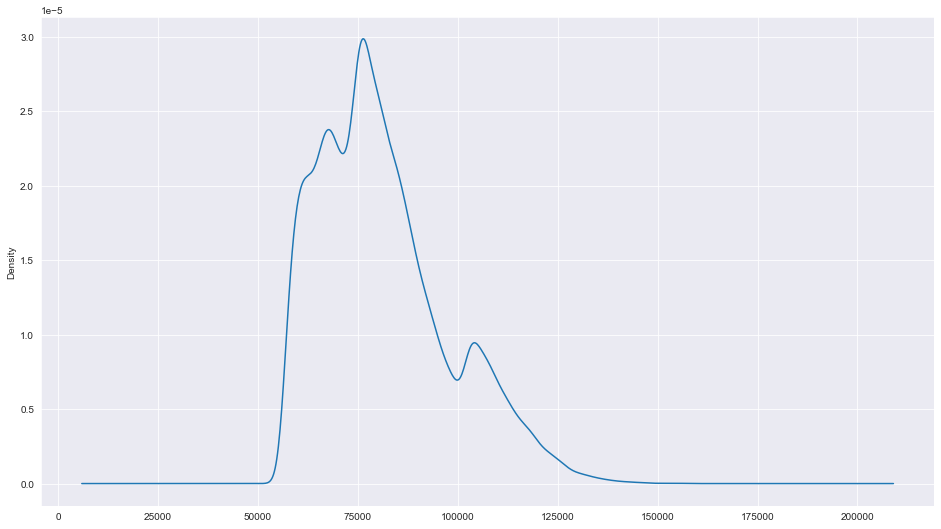

In [62]:
df.Employee_Salary.plot(kind='density')

In [63]:
df.columns

Index(['Employee_Number', 'Employee_Name', 'Gender', 'Department',
       'Department_Number', 'Employee_Salary'],
      dtype='object')

In [64]:
df.Employee_Name.value_counts()

Xiaoqiang Reutenauer    3
Shigeichiro Cunliffe    3
Nahla Tchuente          3
Boutros Lorys           3
Yinghua Hambrick        3
                       ..
Rafail Bultermann       1
Sugwoo Servieres        1
Renee Cherinka          1
Arie Petereit           1
Sachin Tsukuda          1
Name: Employee_Name, Length: 106541, dtype: int64

In [65]:
df.Employee_Salary.value_counts()

82380     12
77378     12
75770     11
77165     11
80562     11
          ..
109132     1
93927      1
99941      1
74915      1
66202      1
Name: Employee_Salary, Length: 48549, dtype: int64

In [66]:
df.Department.value_counts()

Production            46687
Development           19724
Customer Service      13287
Sales                  9596
Human Resources        5970
Finance                5276
Quality Management     4262
Research               3372
Marketing              1132
Name: Department, dtype: int64

<AxesSubplot:ylabel='Department'>

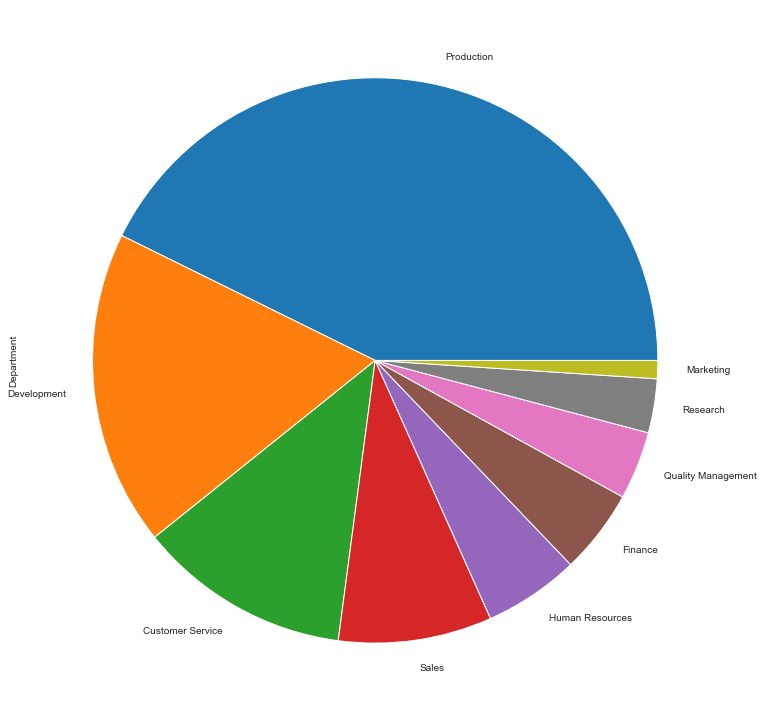

In [71]:
df.Department.value_counts().plot(kind='pie', figsize=(18, 13))

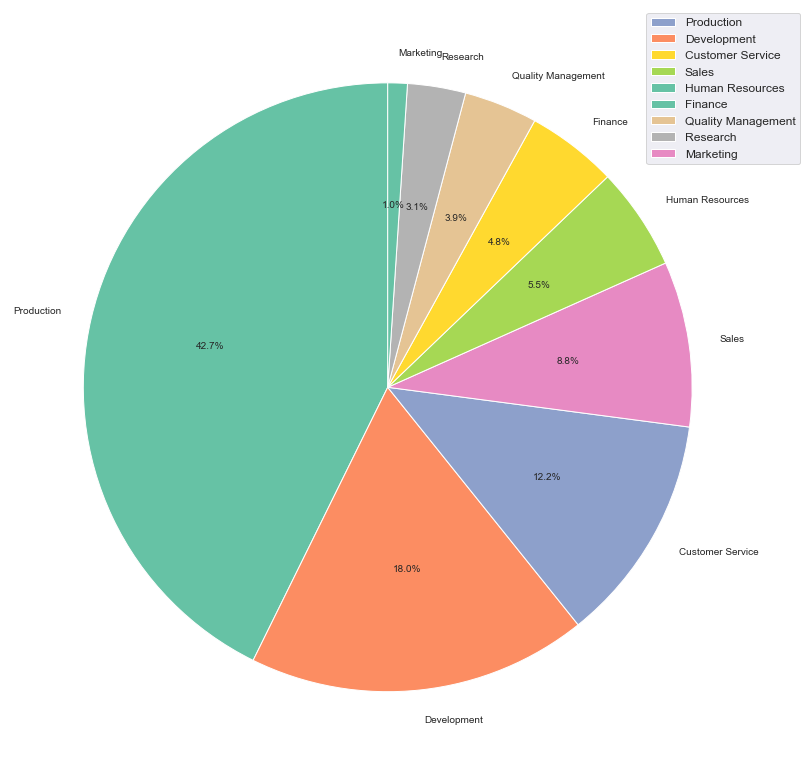

In [81]:
plt.figure(figsize=(20, 14))
colors = sns.color_palette('Set2', 10)
plt.pie(df.Department.value_counts(), 
        labels=df.Department.value_counts().index, colors=colors, 
        autopct='%1.1f%%', startangle=90)
sort_legend = True
if sort_legend:
    handles, labels = plt.gca().get_legend_handles_labels()
    sorted_handles = sorted(handles, key=lambda h: str(labels[handles.index(h)]))
    plt.legend(sorted_handles, labels, loc='best', bbox_to_anchor=(1.05, 1), fontsize=12)
plt.show()


<AxesSubplot:xlabel='Department', ylabel='Employee_Salary'>

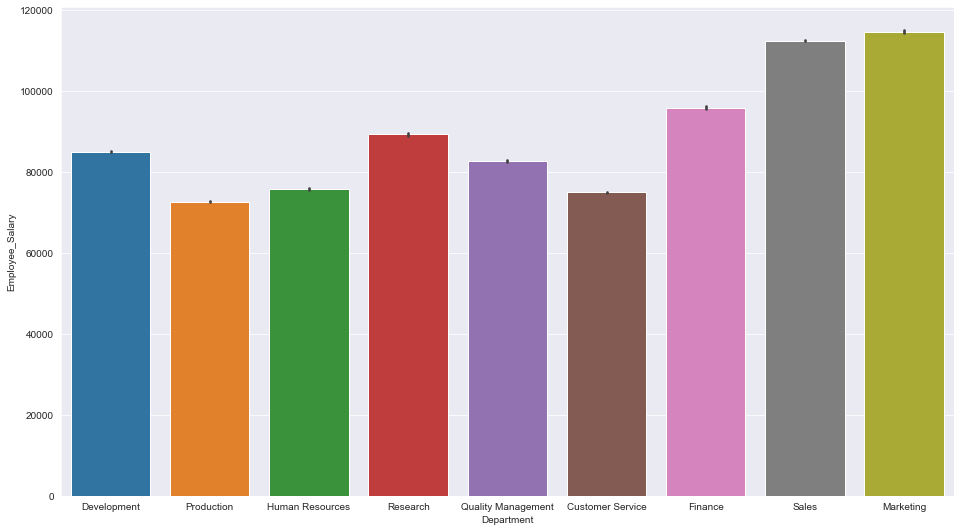

In [82]:
sns.barplot(x='Department', y='Employee_Salary', data=df)

In [83]:
df.columns

Index(['Employee_Number', 'Employee_Name', 'Gender', 'Department',
       'Department_Number', 'Employee_Salary'],
      dtype='object')

In [98]:
# what is the average salary for men and women?
print(df.groupby('Gender').agg({'Employee_Salary': 'mean'}))

        Employee_Salary
Gender                 
F          81248.240528
M          81335.455227
